Shape of raw data: (500, 10)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          500 non-null    object 
 1   age              500 non-null    int64  
 2   gender           500 non-null    object 
 3   screen_time_hrs  500 non-null    float64
 4   sleep_quality    500 non-null    float64
 5   stress_level     500 non-null    float64
 6   detox_days       500 non-null    float64
 7   exercise_freq    500 non-null    float64
 8   platform         500 non-null    object 
 9   happiness        500 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 39.2+ KB
None

Missing values per column:
user_id            0
age                0
gender             0
screen_time_hrs    0
sleep_quality      0
stress_level       0
detox_days         0
exercise_freq      0
platform           0
happiness          0
dt

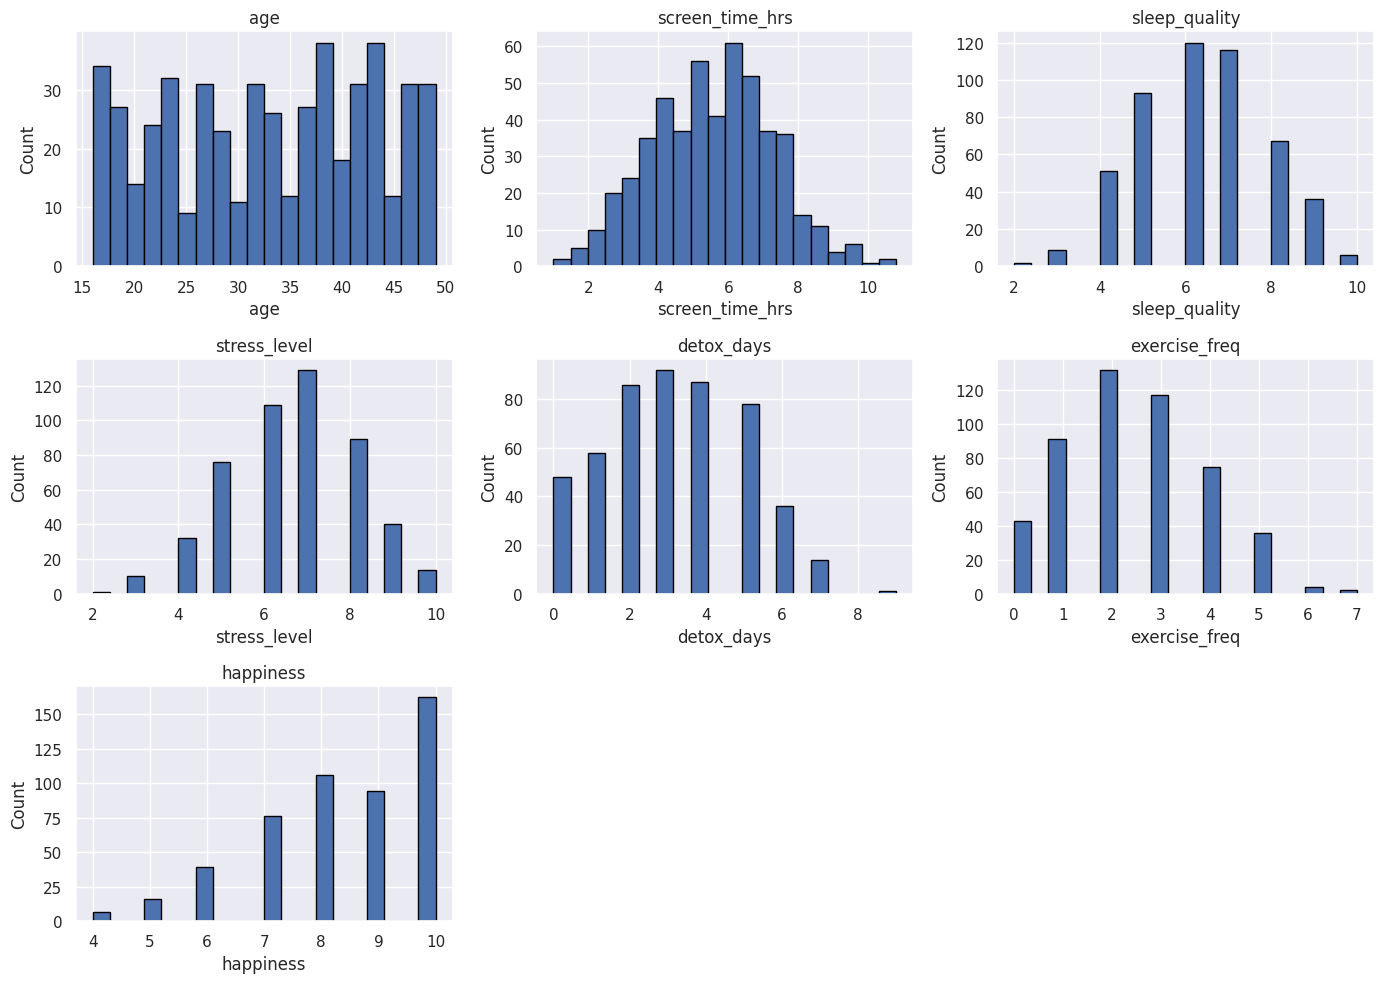

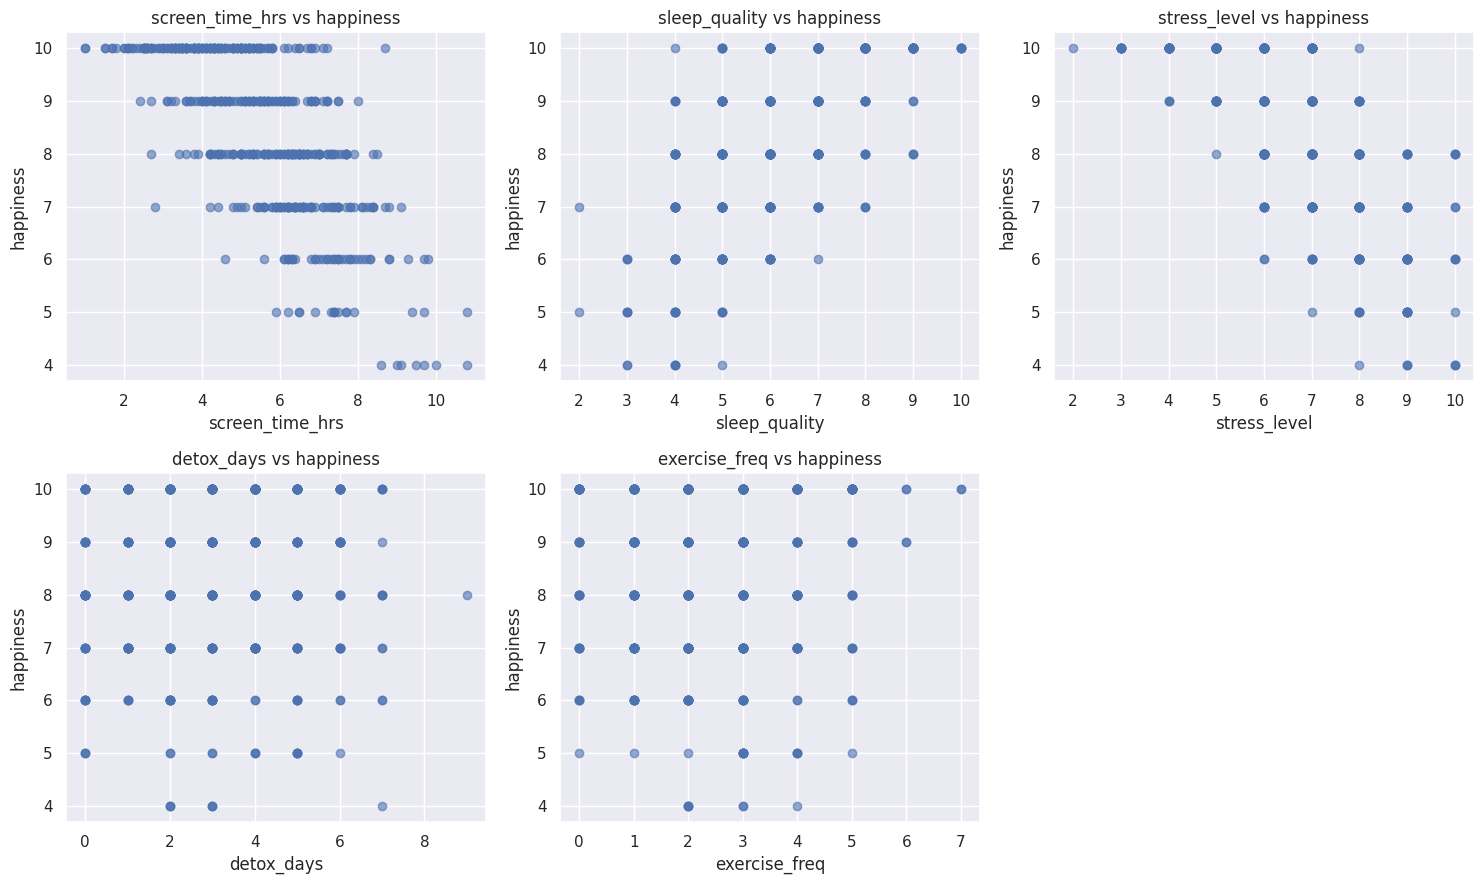

platform
Instagram      7.986486
YouTube        8.306667
Facebook       8.345679
TikTok         8.378947
LinkedIn       8.517241
X (Twitter)    8.647727
Name: happiness, dtype: float64


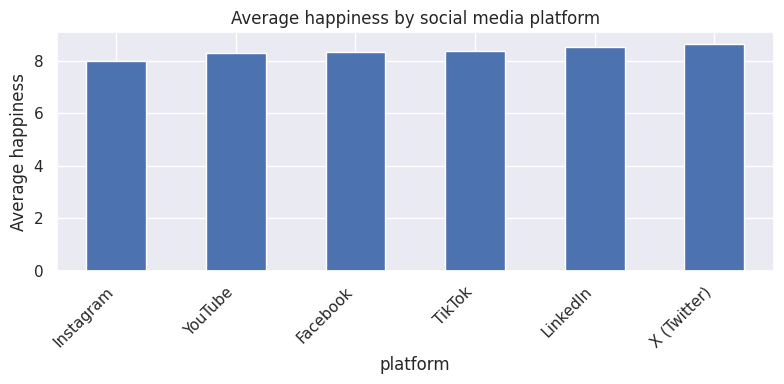

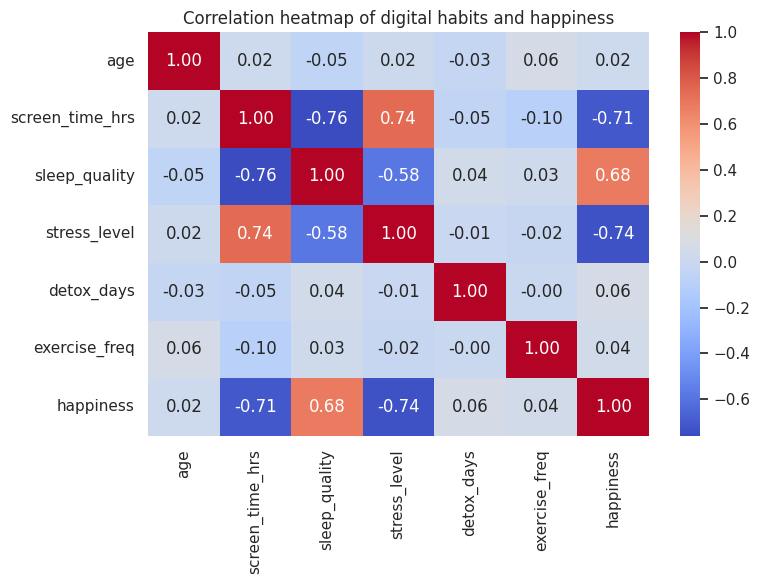

,happiness
happiness,1.000000
sleep_quality,0.678829
detox_days,0.063525
exercise_freq,0.041224
age,0.018513
screen_time_hrs,-0.705206
stress_level,-0.737213


In [ ]:
# 1. SETUP: Import libraries

import zipfile
import io

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Make plots
plt.style.use("default")
sns.set_theme()

# For reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# 2. LOAD DATA: Read CSV from ZIP

#     csv_name = "Mental_Health_and_Social_Media_Balance_Dataset.csv"

csv_filename = "Mental_Health_and_Social_Media_Balance_Dataset.csv"
df_raw = pd.read_csv(csv_filename)

print("Shape of raw data:", df_raw.shape)
df_raw.head()


# 3. DATA CLEANING: Rename columns for clarity and convenience

df = df_raw.copy()

rename_map = {
    "User_ID": "user_id",
    "Age": "age",
    "Gender": "gender",
    "Daily_Screen_Time(hrs)": "screen_time_hrs",
    "Sleep_Quality(1-10)": "sleep_quality",
    "Stress_Level(1-10)": "stress_level",
    "Days_Without_Social_Media": "detox_days",
    "Exercise_Frequency(week)": "exercise_freq",
    "Social_Media_Platform": "platform",
    "Happiness_Index(1-10)": "happiness"
}

df.rename(columns=rename_map, inplace=True)

df.head()

# 4. DATA OVERVIEW: Types, missing values, basic stats

print("Info:")
print(df.info())
print("\nMissing values per column:")
print(df.isna().sum())

print("\nDescriptive statistics (numeric columns):")
df.describe()

# 5. EXPLORATORY ANALYSIS – Distributions of key numeric variables

numeric_cols = ["age", "screen_time_hrs", "sleep_quality",
                "stress_level", "detox_days", "exercise_freq", "happiness"]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 10))
axes = axes.flatten()

for ax, col in zip(axes, numeric_cols):
    ax.hist(df[col], bins=20, edgecolor="black")
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

for ax in axes[len(numeric_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


# 6. EXPLORATORY ANALYSIS – Scatter plots vs happiness

features_to_plot = ["screen_time_hrs", "sleep_quality",
                    "stress_level", "detox_days", "exercise_freq"]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 9))
axes = axes.flatten()

for ax, col in zip(axes, features_to_plot):
    ax.scatter(df[col], df["happiness"], alpha=0.6)
    ax.set_xlabel(col)
    ax.set_ylabel("happiness")
    ax.set_title(f"{col} vs happiness")

for ax in axes[len(features_to_plot):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


# 7. EXPLORATORY ANALYSIS – Average happiness by platform

platform_mean = df.groupby("platform")["happiness"].mean().sort_values()
print(platform_mean)

plt.figure(figsize=(8, 4))
platform_mean.plot(kind="bar")
plt.ylabel("Average happiness")
plt.title("Average happiness by social media platform")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# 8. Correlation matrix for numeric variables

corr = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap of digital habits and happiness")
plt.tight_layout()
plt.show()

corr["happiness"].sort_values(ascending=False)

=== Simple Linear Regression: happiness = screen_time_hrs ===
Intercept: 11.770443435746428
Coefficient (screen_time_hrs): -0.6129789115397263
R^2 on test set: 0.559
MAE on test set: 0.833
RMSE on test set: 1.024


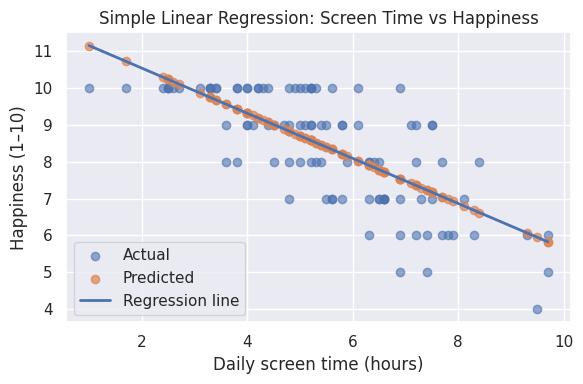

=== Multiple Linear Regression: happiness = digital habits ===
Intercept: 9.628223386965834

Coefficients:
  screen_time_hrs: -0.063
  sleep_quality  : 0.345
  stress_level   : -0.475
  detox_days     : 0.030
  exercise_freq  : -0.010

R^2 on test set: 0.611
MAE on test set: 0.814
RMSE on test set: 0.962
interpretationt:

- On this sample, the linear model explains about 0.61 of the variance in happiness (R^2).
- The feature with the largest positive coefficient is: sleep_quality (0.35).
- The feature with the most negative coefficient is: stress_level (-0.47).

Remember: correlation ≠ causation. This is a simple linear model, not a clinical study.


In [ ]:
# 9. MODEL 1 – Simple Linear Regression

X_simple = df[["screen_time_hrs"]]  # predictor
y = df["happiness"]                 # target

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_simple, y, test_size=0.2, random_state=RANDOM_STATE
)

linreg_simple = LinearRegression()
linreg_simple.fit(X_train_s, y_train_s)

y_pred_s = linreg_simple.predict(X_test_s)

r2_s = r2_score(y_test_s, y_pred_s)
mae_s = mean_absolute_error(y_test_s, y_pred_s)
rmse_s = np.sqrt(mean_squared_error(y_test_s, y_pred_s))

print("=== Simple Linear Regression: happiness = screen_time_hrs ===")
print("Intercept:", linreg_simple.intercept_)
print("Coefficient (screen_time_hrs):", linreg_simple.coef_[0])
print(f"R^2 on test set: {r2_s:.3f}")
print(f"MAE on test set: {mae_s:.3f}")
print(f"RMSE on test set: {rmse_s:.3f}")


# 10. Plot regression line for screen_time_hrs vs happiness

plt.figure(figsize=(6, 4))
plt.scatter(X_test_s["screen_time_hrs"], y_test_s, alpha=0.6, label="Actual")
plt.scatter(X_test_s["screen_time_hrs"], y_pred_s, alpha=0.7, label="Predicted")

# Sort values so the line is not messy
sorted_idx = np.argsort(X_test_s["screen_time_hrs"].values.flatten())
x_sorted = X_test_s["screen_time_hrs"].values.flatten()[sorted_idx]
y_pred_sorted = y_pred_s[sorted_idx]

plt.plot(x_sorted, y_pred_sorted, linewidth=2, label="Regression line")
plt.xlabel("Daily screen time (hours)")
plt.ylabel("Happiness (1–10)")
plt.title("Simple Linear Regression: Screen Time vs Happiness")
plt.legend()
plt.tight_layout()
plt.show()


# 11. MODEL 2 – Multiple Linear Regression

feature_cols = ["screen_time_hrs", "sleep_quality",
                "stress_level", "detox_days", "exercise_freq"]

X = df[feature_cols]
y = df["happiness"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

linreg_multi = LinearRegression()
linreg_multi.fit(X_train, y_train)

y_pred = linreg_multi.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("=== Multiple Linear Regression: happiness = digital habits ===")
print("Intercept:", linreg_multi.intercept_)
print("\nCoefficients:")
for col, coef in zip(feature_cols, linreg_multi.coef_):
    print(f"  {col:15s}: {coef:.3f}")

print(f"\nR^2 on test set: {r2:.3f}")
print(f"MAE on test set: {mae:.3f}")
print(f"RMSE on test set: {rmse:.3f}")


# 12. Coefficients table for interpretation

coef_df = pd.DataFrame({
    "feature": feature_cols,
    "coefficient": linreg_multi.coef_
}).sort_values(by="coefficient", ascending=False)

coef_df


# 13. Summary

print("interpretationt:\n")

print(f"- On this sample, the linear model explains about {r2:.2f} of the variance in happiness (R^2).")
print(f"- The feature with the largest positive coefficient is: "
      f"{coef_df.iloc[0]['feature']} ({coef_df.iloc[0]['coefficient']:.2f}).")
print(f"- The feature with the most negative coefficient is: "
      f"{coef_df.iloc[-1]['feature']} ({coef_df.iloc[-1]['coefficient']:.2f}).")
print("\nRemember: correlation ≠ causation. This is a simple linear model, not a clinical study.")
